In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
y_ref = np.load('1H_reference_shifts.npy')
y_pred = np.load('1H_commitee_prediction.npy')
train_mask = np.load('1H_train_binary_1_hot_N_sample_M_models.npy')

In [24]:
y_ref.shape

(134692,)

In [25]:
y_pred.shape

(134692, 16)

In [26]:
train_mask.shape

(134692, 16)

In [27]:
train_mask[2111]

array([ True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True])

In [28]:
y_val = []
i_val = []
for a in range(len(y_ref)):    
    val = y_pred[a,np.asarray(1-np.asarray(train_mask[a], int), bool)]
    if len(val) < 6 : 
        continue
    i_val.append(a)
    y_val.append(val)
i_val = np.asarray(i_val)

In [29]:
y_val

[array([18.76157314, 18.73118292, 18.61124927, 18.85289862, 18.75787156,
        18.7297743 ]),
 array([18.76156088, 18.73116866, 18.61123775, 18.85288735, 18.75785722,
        18.72976189]),
 array([15.33880278, 15.11676464, 15.30003458, 15.39608441, 15.42791153,
        15.52618375]),
 array([15.33893822, 15.11689803, 15.3001583 , 15.39621823, 15.42804921,
        15.52632686]),
 array([25.77691769, 25.5524389 , 25.63203466, 25.82558021, 25.44844654,
        25.66908919]),
 array([25.77688339, 25.55240225, 25.63199388, 25.82554652, 25.4484108 ,
        25.66905409]),
 array([29.36164927, 29.2985926 , 29.096677  , 29.41623216, 29.17717775,
        29.33994759]),
 array([29.36164237, 29.29858305, 29.09666305, 29.41622792, 29.17716853,
        29.33993187]),
 array([28.72650273, 28.54814111, 28.76790352, 28.97530322, 28.61427926,
        28.69570892]),
 array([28.72653065, 28.54817744, 28.76792613, 28.97532303, 28.61430616,
        28.69572839]),
 array([29.55455008, 29.72271236, 29.690

In [30]:
y_mean = np.asarray([y.mean() for y in y_val])
y_var = np.asarray([y.var(ddof=1) for y in y_val])

In [31]:
y_var

array([0.0060573 , 0.0060573 , 0.01924996, ..., 0.00631773, 0.00631739,
       0.00631785])

In [21]:
# not corrected
alpha = np.sqrt(np.mean((y_ref[i_val]-y_mean)**2/y_var))

In [22]:
alpha

5.407140210206114

In [19]:
# with correction for small model size
n_val = np.asarray([ len(y) for y in y_val ])
alpha = np.sqrt(np.mean(-1/n_val +(n_val-3)/(n_val-1) * (y_ref[i_val]-y_mean)**2/y_var))

In [20]:
alpha

4.272231943395472

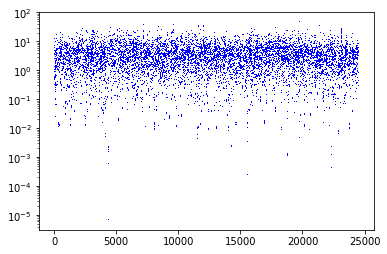

In [15]:
plt.semilogy(np.sqrt((y_ref[i_val]-y_mean)**2/y_var), 'b,')

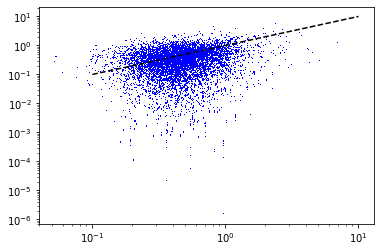

In [16]:
plt.loglog(np.sqrt(y_var)*alpha, np.abs(y_ref[i_val]-y_mean), 'b,')
plt.loglog([1e-1,1e1],[1e-1,1e1], 'k--')

In [17]:
sel = np.where((alpha*np.sqrt(y_var)<0.2) & (alpha*np.sqrt(y_var)>0.1) )[0]
sel_err = (y_ref[i_val]-y_mean)[sel]
sel_comm = np.concatenate([((y_val[i] - y_mean[i])*alpha) for i in sel])

(-5.0, 5.0)

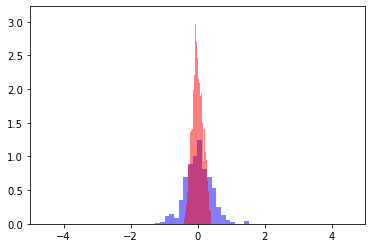

In [18]:
plt.hist(sel_err, 20, density=True, color=(0,0,1,0.5));
plt.hist(sel_comm, 100, density=True, color=(1,0,0,0.5));
plt.xlim(-5,5)

In [19]:
sel = np.where((alpha*np.sqrt(y_var)<0.7) & (alpha*np.sqrt(y_var)>0.6) )[0]
sel_err = (y_ref[i_val]-y_mean)[sel]
sel_comm = np.concatenate([((y_val[i] - y_mean[i])*alpha) for i in sel])

(-5.0, 5.0)

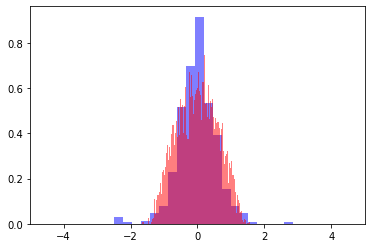

In [20]:
plt.hist(sel_err, 20, density=True, color=(0,0,1,0.5));
plt.hist(sel_comm, 100, density=True, color=(1,0,0,0.5));
plt.xlim(-5,5)

In [21]:
sel = np.where((alpha*np.sqrt(y_var)<2) & (alpha*np.sqrt(y_var)>1) )[0]
sel_err = (y_ref[i_val]-y_mean)[sel]
sel_comm = np.concatenate([((y_val[i] - y_mean[i])*alpha) for i in sel])

(-5.0, 5.0)

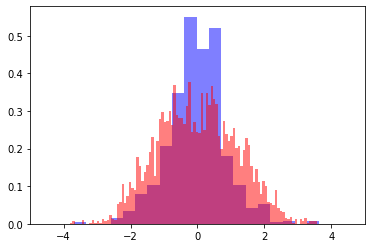

In [22]:
plt.hist(sel_err, 20, density=True, color=(0,0,1,0.5));
plt.hist(sel_comm, 100, density=True, color=(1,0,0,0.5));
plt.xlim(-5,5)

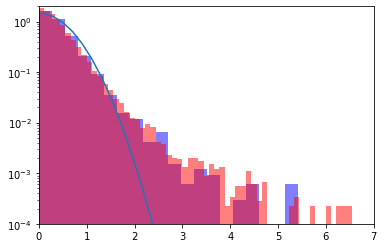

In [23]:
sel_err = (y_ref[i_val]-y_mean)
sel_comm = np.concatenate([((y_val[i] - y_mean[i])*alpha) for i in range(len(y_val))])
plt.hist(np.abs(sel_err), 20, density=True, color=(0,0,1,0.5));
plt.hist(np.abs(sel_comm), 100, density=True, color=(1,0,0,0.5));
std = np.sqrt((sel_err**2).mean())
xx = np.linspace(-10,10,100)
plt.plot(xx, 2*np.exp(-xx**2/(2*std**2))/np.sqrt(2*np.pi*std**2))
plt.xlim(0,7)
plt.ylim(1e-4,2)
plt.yscale("log")

# scaling and constant version

In [408]:
# not corrected
beta2 = 0.17
alpha2 = 7

In [410]:
mix = 0.001
for i in range(1000):
    gamma2 = beta2/alpha2
    alpha2 = alpha2*(1-mix)+ mix*np.mean((y_ref[i_val]-y_mean)**2*y_var/(y_var+gamma2)**2 ) / np.mean(y_var/(y_var+gamma2))
    beta2 = gamma2*alpha2
    d2 = alpha2/beta2
    beta2 = beta2*(1-mix)+mix*np.mean((y_ref[i_val]-y_mean)**2/(y_var*d2+1)**2 ) / np.mean(1/(y_var*d2+1))
    alpha2 = d2*beta2
    print(alpha2, beta2)
    print(np.mean( -(y_ref[i_val]-y_mean)**2/(2*(beta2+alpha2*y_var))-0.5*np.log(beta2+alpha2*y_var)  ))

6.634625001033791 0.16112660716796354
0.17264278931697222
6.634511079026625 0.16112384049064665
0.17264287777525983
6.634397384749553 0.16112107934391776
0.1726429659127636
6.63428391774734 0.16111832371672116
0.17264305373068992
6.634170677565665 0.16111557359802334
0.17264314123024052
6.634057663751113 0.16111282897681278
0.17264322841261237
6.633944875851175 0.1611100898421
0.1726433152789982
6.63383231341425 0.16110735618291755
0.17264340183058594
6.633719975989635 0.16110462798831976
0.17264348806855895
6.633607863127532 0.16110190524738296
0.17264357399409636
6.633495974379041 0.16109918794920533
0.17264365960837239
6.633384309296159 0.16109647608290675
0.17264374491255705
6.633272867431776 0.1610937696376289
0.17264382990781582
6.633161648339682 0.16109106860253516
0.17264391459530978
6.6330506515745515 0.16108837296681058
0.17264399897619537
6.632939876691955 0.1610856827196618
0.17264408305162482
6.632829323248349 0.1610829978503171
0.1726441668227459
6.632718990801076 0.16108

In [411]:

print(np.mean( -(y_ref[i_val]-y_mean)**2/(2*((beta2-0.01)+alpha2*y_var))-0.5*np.log((beta2-0.01)+alpha2*y_var)  ))

0.17233363284943992


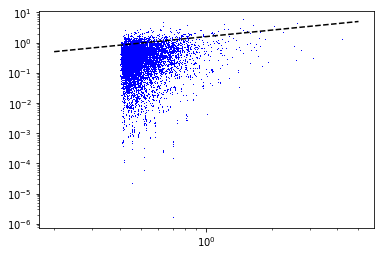

In [412]:
plt.loglog(np.sqrt(beta2+y_var*alpha2), np.abs(y_ref[i_val]-y_mean), 'b,')
plt.loglog([2e-1,5e0],[5e-1,5e0], 'k--')

In [263]:
beta2=0; gamma2=0
alpha2 = np.mean((y_ref[i_val]-y_mean)**2*y_var/(y_var+gamma2)**2 ) / np.mean(y_var/(y_var+gamma2))
print(np.mean( -(y_ref[i_val]-y_mean)**2/(2*(beta2+alpha2*y_var))-0.5*np.log(beta2+alpha2*y_var)  ))

0.04999699501193118


In [266]:
galpha2 = np.geomspace(0.2,30,20)
gbeta2 = np.geomspace(1e-2,0.4,20)
ll = []
for alpha2 in galpha2:
    for beta2 in gbeta2:
        ll.append(np.mean( -(y_ref[i_val]-y_mean)**2/(2*(beta2+alpha2*y_var))-0.5*np.log(beta2+alpha2*y_var)  ))
ll = np.asarray(ll).reshape(len(galpha2), len(gbeta2))

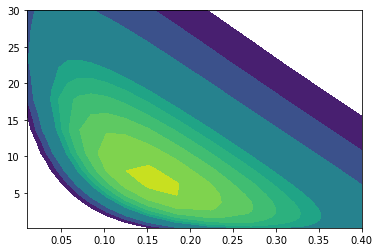

In [269]:
plt.contourf(gbeta2, galpha2, ll, [0.02,0.05, 0.08, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.2])

In [231]:
ll

array([[-3.47016736e+01, -2.37866366e+01, -1.44718543e+01,
        -7.72216705e+00, -3.51858152e+00, -1.25410831e+00,
        -2.25540227e-01,  1.04740036e-01,  6.97524449e-02,
        -1.47347785e-01],
       [-2.29206638e+01, -1.68757867e+01, -1.10247084e+01,
        -6.26291645e+00, -2.99043503e+00, -1.08846910e+00,
        -1.80516806e-01,  1.14594031e-01,  7.08237142e-02,
        -1.47865813e-01],
       [-1.41379122e+01, -1.11091524e+01, -7.78421853e+00,
        -4.72347129e+00, -2.37433880e+00, -8.80630438e-01,
        -1.21911920e-01,  1.27306701e-01,  7.18196513e-02,
        -1.48928446e-01],
       [-8.11205996e+00, -6.73441069e+00, -5.02995039e+00,
        -3.25304675e+00, -1.71845177e+00, -6.39384727e-01,
        -5.08654775e-02,  1.42008085e-01,  7.19222103e-02,
        -1.51107186e-01],
       [-4.27930419e+00, -3.70716768e+00, -2.91856014e+00,
        -1.99249566e+00, -1.09126642e+00, -3.86599620e-01,
         2.69896011e-02,  1.56289867e-01,  6.94612876e-02,
        -1.

In [426]:
xi = np.random.uniform(size=y_pred.shape[1])
xi -= np.mean(xi)
xi/=np.std(xi)

In [431]:
y_val[4]

array([25.77691769, 25.5524389 , 25.63203466, 25.82558021, 25.44844654,
       25.66908919])

(-5.0, 5.0)

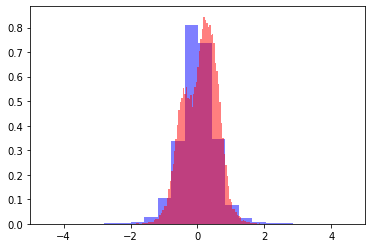

In [433]:
sel = np.where((np.sqrt(alpha2*y_var+beta2)<1) & (np.sqrt(alpha2*y_var+beta2)>0.1) )[0]
sel_err = (y_ref[i_val]-y_mean)[sel]
sel_comm = np.concatenate([((y_val[i] - y_mean[i])*np.sqrt(alpha2) + np.sqrt(beta2)*xi[:len(y_val[i])] ) for i in sel])
plt.hist(sel_err, 20, density=True, color=(0,0,1,0.5));
plt.hist(sel_comm, 100, density=True, color=(1,0,0,0.5));
plt.xlim(-5,5)

(-5.0, 5.0)

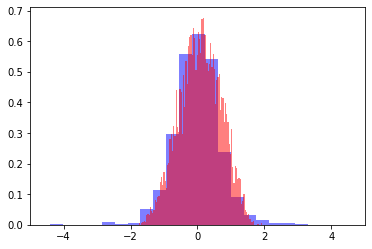

In [434]:
sel = np.where((np.sqrt(alpha2*y_var+beta2)<0.8) & (np.sqrt(alpha2*y_var+beta2)>0.6) )[0]
sel_err = (y_ref[i_val]-y_mean)[sel]
sel_comm = np.concatenate([((y_val[i] - y_mean[i])*np.sqrt(alpha2) + np.sqrt(beta2)*xi[:len(y_val[i])] ) for i in sel])
plt.hist(sel_err, 20, density=True, color=(0,0,1,0.5));
plt.hist(sel_comm, 100, density=True, color=(1,0,0,0.5));
plt.xlim(-5,5)

(-5.0, 5.0)

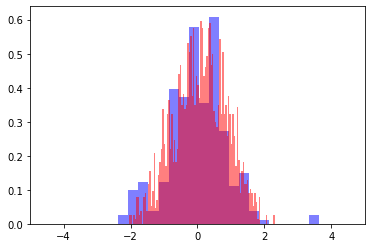

In [435]:
sel = np.where((np.sqrt(alpha2*y_var+beta2)<1) & (np.sqrt(alpha2*y_var+beta2)>0.8) )[0]
sel_err = (y_ref[i_val]-y_mean)[sel]
sel_comm = np.concatenate([((y_val[i] - y_mean[i])*np.sqrt(alpha2) + np.sqrt(beta2)*xi[:len(y_val[i])] ) for i in sel])
plt.hist(sel_err, 20, density=True, color=(0,0,1,0.5));
plt.hist(sel_comm, 100, density=True, color=(1,0,0,0.5));
plt.xlim(-5,5)

(-5.0, 5.0)

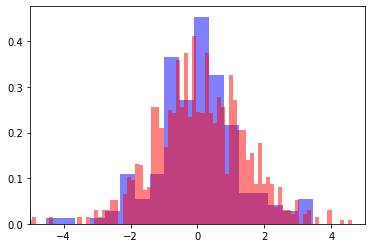

In [436]:
sel = np.where((np.sqrt(alpha2*y_var+beta2)<5) & (np.sqrt(alpha2*y_var+beta2)>1) )[0]
sel_err = (y_ref[i_val]-y_mean)[sel]
sel_comm = np.concatenate([((y_val[i] - y_mean[i])*np.sqrt(alpha2) + np.sqrt(beta2)*xi[:len(y_val[i])] ) for i in sel])
plt.hist(sel_err, 20, density=True, color=(0,0,1,0.5));
plt.hist(sel_comm, 100, density=True, color=(1,0,0,0.5));
plt.xlim(-5,5)

In [887]:
def fa2(gamma2, ydelta, yvar): # alpha given gamma
    return np.mean(ydelta**2/(gamma2+yvar)**2)/np.mean(1/(gamma2+yvar))
def loglike0(ydelta): # baseline log-likelihood: all points with a uncertainty RMSE
    mse = np.var(ydelta)
    return np.mean( -ydelta**2/(2*mse)-0.5*np.log(mse) )
def loglike(alpha2, beta2, ydelta, yvar): # relative likelihood
    return np.mean( -ydelta**2/(2*(beta2+alpha2*yvar))-0.5*np.log(beta2+alpha2*yvar) )-loglike0(ydelta)

In [888]:
fa2(0, y_delta, y_var)

71.15745497094974

In [674]:
def fgamma2(gamma2, ydelta, yvar):
    return np.mean(ydelta**2*yvar/(gamma2+yvar)**2-fa2(gamma2,ydelta,yvar)*yvar/(gamma2+yvar))
def f1gamma2(gamma2, ydelta, yvar, h=1e-10): # finite differences because I'm lazy
    return (fgamma2(gamma2+h, ydelta, yvar)-fgamma2(gamma2, ydelta, yvar))/h

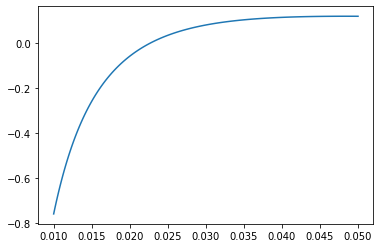

In [675]:
lgamma2 = np.geomspace(1e-2,0.05,100)
plt.plot(lgamma2, [fgamma2(g2, y_delta, y_var) for g2 in lgamma2])

finds solution with Newton

In [676]:
g2 = 1e-5

In [677]:
for i in range(20):
    g2-=fgamma2(g2, y_delta, y_var)/f1gamma2(g2, y_delta, y_var)
    a2= fa2(g2, y_delta, y_var)
    b2 = a2*g2
    ll=loglike(a2,b2,y_delta,y_var)
    print(g2, ll)

0.00027095190701482123 -0.12269076593409717
0.0010142417565390893 -0.050180705994640806
0.002501671508134267 0.0007843268176152135
0.00497474284695931 0.03200197058100221
0.00855413522329954 0.048846231143281266
0.01305434078961222 0.05659180445959483
0.01771258786193371 0.059341084074862493
0.02115984042659939 0.05993733811133073
0.02249504079833011 0.059984475808284254
0.02264430482916471 0.059984932155109055
0.022645936775661228 0.059984932208084735
0.02264593696754506 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735


In [678]:
y_delta=(y_ref[i_val]-y_mean)

In [679]:
a2= fa2(g2, y_delta, y_var)
b2 = a2*g2

In [680]:
loglike(a2,b2,y_delta,y_var)

0.059984932208084735

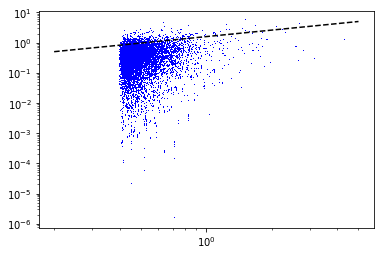

In [681]:
plt.loglog(np.sqrt(b2+y_var*a2), np.abs(y_delta), 'b,')
plt.loglog([2e-1,5e0],[5e-1,5e0], 'k--')

# alternative calculation 

In [889]:
def fa2(gamma2, ydelta, yvar): # alpha given gamma
    return np.mean(ydelta**2*yvar/(gamma2+yvar)**2)/np.mean(yvar/(gamma2+yvar))
def loglike0(ydelta): # baseline log-likelihood: all points with a uncertainty RMSE
    mse = np.var(ydelta)
    return np.mean( -ydelta**2/(2*mse)-0.5*np.log(mse) )
def loglike(alpha2, beta2, ydelta, yvar): # relative likelihood
    return np.mean( -ydelta**2/(2*(beta2+alpha2*yvar))-0.5*np.log(beta2+alpha2*yvar) )-loglike0(ydelta)

In [890]:
fa2(0, y_delta, y_var)

29.23716525282782

In [891]:
def fgamma2(gamma2, ydelta, yvar):
    return np.mean(ydelta**2/(gamma2+yvar)**2-fa2(gamma2,ydelta,yvar)/(gamma2+yvar))
def f1gamma2(gamma2, ydelta, yvar, h=1e-10): # finite differences because I'm lazy
    return (fgamma2(gamma2+h, ydelta, yvar)-fgamma2(gamma2, ydelta, yvar))/h

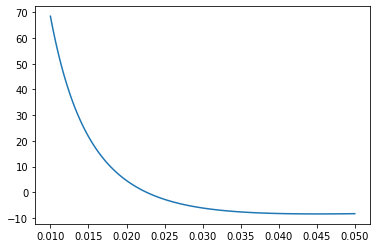

In [892]:
lgamma2 = np.geomspace(1e-2,0.05,100)
plt.plot(lgamma2, [fgamma2(g2, y_delta, y_var) for g2 in lgamma2])

finds solution with Newton

In [893]:
g2 = 1e-5

In [895]:
for i in range(20):
    g2-=fgamma2(g2, y_delta, y_var)/f1gamma2(g2, y_delta, y_var)
    a2= fa2(g2, y_delta, y_var)
    b2 = a2*g2
    ll=loglike(a2,b2,y_delta,y_var)
    print(g2, ll)

0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735
0.022645936967545043 0.059984932208084735


# also adds a non-linear scaling to the optimization

In [1094]:
def loglike0(ydelta): # baseline log-likelihood: all points with a uncertainty RMSE
    mse = np.var(ydelta)
    return np.mean( -ydelta**2/(2*mse)-0.5*np.log(mse) )
def loglike(alpha2, beta2, theta, ydelta, yvar): # relative likelihood
    return np.mean( -ydelta**2/(2*(beta2+alpha2*yvar**(1+theta)))-
                   0.5*np.log(beta2+alpha2*yvar**(1+theta)) )-loglike0(ydelta)

In [1185]:
dd = 1e-5
def nfalpha2(alpha2, beta2, theta, ydelta, yvar, h=dd):
    return ( loglike(alpha2+h, beta2, theta, ydelta, yvar) - loglike(alpha2, beta2, theta, ydelta, yvar) ) /h
def nfbeta2(alpha2, beta2, theta, ydelta, yvar, h=dd):
    return ( loglike(alpha2, beta2+h, theta, ydelta, yvar)-loglike(alpha2, beta2, theta, ydelta, yvar) ) /h
def nftheta(alpha2, beta2, theta, ydelta, yvar, h=dd):
    return ( loglike(alpha2, beta2, theta+h, ydelta, yvar)-loglike(alpha2, beta2, theta, ydelta, yvar) ) /h
def nf1alpha2(alpha2, beta2, theta, ydelta, yvar, h=dd):
    return ( nfalpha2(alpha2+h, beta2, theta, ydelta, yvar) - nfalpha2(alpha2, beta2, theta, ydelta, yvar) ) /h
def nf1beta2(alpha2, beta2, theta, ydelta, yvar, h=dd):
    return ( nfbeta2(alpha2, beta2+h, theta, ydelta, yvar) - nfbeta2(alpha2, beta2, theta, ydelta, yvar) ) /h
def nf1theta(alpha2, beta2, theta, ydelta, yvar, h=dd):
    return ( nftheta(alpha2, beta2, theta+h, ydelta, yvar) - nftheta(alpha2, beta2, theta, ydelta, yvar) ) /h

In [1186]:
nf1theta(a2, b2, 0, y_delta, y_var)

-1.1143472256058828

In [1248]:
a, b, t = 29, 0.01, 0

In [1256]:
for i in range(100):
    if i%10==0:
        print(loglike(a, b, t, y_delta, y_var),":",(a, b, t), nfalpha2(a, b, t, y_delta, y_var), nfbeta2(a, b, t, y_delta, y_var), nftheta(a, b, t, y_delta, y_var))
    t-= nftheta(a, b, t, y_delta, y_var)/nf1theta(a2, b2, 0, y_delta, y_var)
    a-= nfalpha2(a, b, t, y_delta, y_var)/nf1alpha2(a2, b2, 0, y_delta, y_var)             
    b-= nfbeta2(a, b, t, y_delta, y_var)/nf1beta2(a2, b2, 0, y_delta, y_var)             

0.060096356249298793 : (5.341548566274499, 0.14564049387746425, -0.09049986756757859) 0.0 -8.326672684688674e-12 0.0
0.060096356249298793 : (5.341548566274499, 0.14564049387746425, -0.09049986756757859) 0.0 -8.326672684688674e-12 0.0
0.060096356249298793 : (5.341548566274499, 0.14564049387746425, -0.09049986756757859) 0.0 -8.326672684688674e-12 0.0
0.060096356249298793 : (5.341548566274499, 0.14564049387746425, -0.09049986756757859) 0.0 -8.326672684688674e-12 0.0
0.060096356249298793 : (5.341548566274499, 0.14564049387746425, -0.09049986756757859) 0.0 -8.326672684688674e-12 0.0
0.060096356249298793 : (5.341548566274499, 0.14564049387746425, -0.09049986756757859) 0.0 -8.326672684688674e-12 0.0
0.060096356249298793 : (5.341548566274499, 0.14564049387746425, -0.09049986756757859) 0.0 -8.326672684688674e-12 0.0
0.060096356249298793 : (5.341548566274499, 0.14564049387746425, -0.09049986756757859) 0.0 -8.326672684688674e-12 0.0
0.060096356249298793 : (5.341548566274499, 0.14564049387746425, 

In [1239]:
print(a, b, t)
loglike(a, b, t, y_delta, y_var)

5.3415485968562 0.14564049414559777 -0.09049986543238503


0.060096356249326494

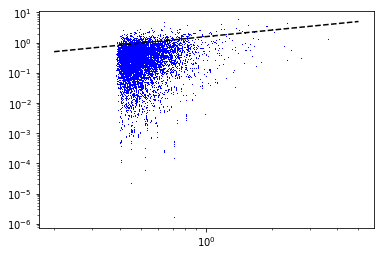

In [1257]:
plt.loglog(np.sqrt(b+y_var**(1+t)*a), np.abs(y_delta), 'b,')
plt.loglog([2e-1,5e0],[5e-1,5e0], 'k--')

In [1147]:
ftheta(b2/a2,-0.002,y_delta,y_var)

3.8576155873867717

In [1130]:
fa2(b2/a2, 0, y_delta, y_var)

6.86921059371896

In [1148]:
falpha2(b2/a2, a2+0.1, 0, y_delta, y_var)

-0.036005192258524124

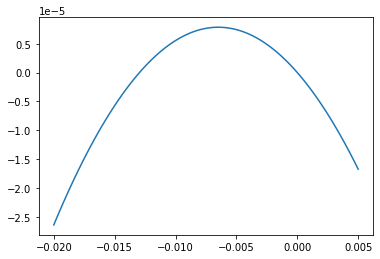

In [1157]:
lth = np.linspace(-2e-2,5e-3,100)
plt.plot(lth, [ loglike(fa2(b2/a2,th,y_delta,y_var), b2, th, y_delta, y_var)-loglike(a2,b2,0,y_delta,y_var) for th in lth])
#plt.plot(lth, [ nftheta(b2/a2, th, y_delta, y_var)*1e-3 for th in lth])

In [1042]:
th=0
g2=b2/a2
loglike(fa2(g2, th, y_delta, y_var),g2*fa2(g2, th, y_delta, y_var), th, y_delta, y_var  )

0.059984932208084735

In [1036]:
fgamma2(g2, th, y_delta, y_var)

2.374562922264407e-15

In [1037]:
fa2(g2, th, y_delta, y_var)

6.86921059371896

In [1038]:
ftheta(g2, th, y_delta, y_var)

-13.926812772251575

In [1039]:
f1theta(g2, th, y_delta, y_var)

-5.890701260113929

In [1082]:
th -= ftheta(g2, th, y_delta, y_var)/f1theta(g2, th, y_delta, y_var)
print(ftheta(g2, th, y_delta, y_var), fgamma2(g2, th, y_delta, y_var), fa2(g2, th, y_delta, y_var))
loglike(fa2(g2, th, y_delta, y_var),g2*fa2(g2, th, y_delta, y_var), th, y_delta, y_var  )

-7.582122603427409e-14 0.0010463835527296668 0.27994996743031


-0.001897309037315248

In [1090]:
g2 -= fgamma2(g2, th, y_delta, y_var)/f1gamma2(g2, th, y_delta, y_var)
print(th, g2)
print(ftheta(g2, th, y_delta, y_var), fgamma2(g2, th, y_delta, y_var), fa2(g2, th, y_delta, y_var))
loglike(fa2(g2, th, y_delta, y_var),g2*fa2(g2, th, y_delta, y_var), th, y_delta, y_var  )

-2.013249175265937 25.520556272494822
0.026650506302253966 1.5941291647595404e-06 0.011019913135599734


-7.759000288162787e-05

In [984]:
print(th, g2)
print(ftheta(g2, th, y_delta, y_var), fgamma2(g2, th, y_delta, y_var), fa2(g2, th, y_delta, y_var))
loglike(fa2(g2, th, y_delta, y_var),g2*fa2(g2, th, y_delta, y_var), th, y_delta, y_var  )

-47.697992963527795 3181.7389756056286
1.357568031602205e-08 2.4344307557057066e-10 1.4839319577712368e-07


<ipython-input-901-afcc45cfefd9>:7: RuntimeWarning: overflow encountered in square
  return np.mean(yvar**(1+theta/2)*np.log(yvar)/(gamma2+yvar**(1+theta)/2)**2


-46.49583458261152